# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [1]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [13]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    # pass  # ⬅️✏️
    c = [0] * len(a)
    for i in range(len(a)):
        c[i] = a[i] * b[i]
    return c

---

In [15]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [16]:
# Define a scalar: bias b
my_b = -5

In [17]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    # pass  # ⬅️✏️
    # wx + b is a linear combination of the inputs and weights
    return sum(mul(x, weights)) + bias

---

In [18]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [19]:
# Import exp() function (safe on lists)
from numpy import exp

In [20]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    # pass  # ⬅️✏️
    # logistic sigmoid is S(z) = 1/(1+exp(-z))
    return 1 / (1 + exp(-z))

---

In [21]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.0066928509242848554
0.5
0.9933071490757153


In [22]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

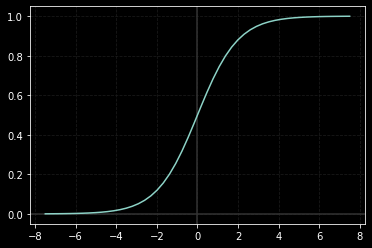

In [23]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [25]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    # pass  # ⬅️✏️
    return sigmoid(linear_neuron(x, weights, bias))

---

In [26]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [27]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    # pass  # ⬅️✏️
    return neuron(x, [1, 1], -0.5)

---

In [28]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [29]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.378
[0, 1] 0.622
[1, 0] 0.622
[1, 1] 0.818


In [30]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    # pass  # ⬅️✏️
    return neuron(x, [1, 1], -1.5)

---

In [31]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.182
[0, 1] 0.378
[1, 0] 0.378
[1, 1] 0.622


In [33]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    # pass  # ⬅️✏️
    return neuron(x, [-1], 0.5)

---

In [34]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 0.622
[1] 0.378


![X-OR](res/x-or_circuit.png)

In [35]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    # pass  # ⬅️✏️
    return or_neuron([and_neuron([not_neuron([x[0]]), x[1]]), and_neuron([x[0], not_neuron([x[1]])])])

---

In [36]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.522
[0, 1] 0.569
[1, 0] 0.569
[1, 1] 0.608


![Half-adder](../../res/half-adder_circuit.png)

In [37]:
# Combine a XOR and an AND into a half-adder
# ⬅️✏️
def half_adder(x):
    """
    Return x1 XOR x2, x1 AND x2
    """
    return [xor_neuron(x), and_neuron(x)]

---

![Adder](../../res/adder_circuit.png)

In [ ]:
# Combine two half-adders and an OR into a (full) adder
# ⬅️✏️
def full_adder(x):
    """
    Return x1 XOR x2 XOR x3, x1 AND x2 OR x1 AND x3 OR x2 AND x3
    """
    return [xor_neuron([x[0], x[1], x[2]]), or_neuron([and_neuron([x[0], x[1]]), and_neuron([x[0], x[2]]), and_neuron([x[1], x[2]])])]

---